In [232]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from datetime import timedelta
import datetime


In [233]:
df = pd.read_csv('test_rfm.csv')

In [234]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

date_limite = datetime.datetime(2009, 12, 31)

df_filtered = df[df['InvoiceDate'] <= date_limite]

scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df_filtered[['Recence', 'Frequence', 'Montant']])
optimal_n = 4

kmeans = KMeans(n_clusters=optimal_n, random_state=0)
clusters = kmeans.fit_predict(df_scale)

df_filtered['Cluster'] = clusters

/tmp/ipykernel_91251/594026760.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = clusters


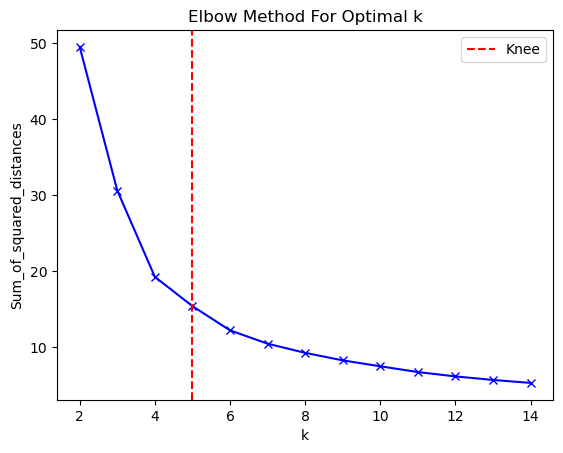

Valeur de k coude : 5


In [235]:
df_scale = scaler.fit_transform(df_filtered[['Recence', 'Frequence', 'Montant']])

Sum_of_squared_distances = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

k_values = list(range(2, 15))
Sum_of_squared_distances = np.array(Sum_of_squared_distances)

kneedle = KneeLocator(k_values, Sum_of_squared_distances, curve='convex', direction='decreasing')
k_value = kneedle.knee

plt.plot(k_values, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=k_value, color='r', linestyle='--', label='Knee')
plt.legend()
plt.show()

print("Valeur de k coude :", k_value)

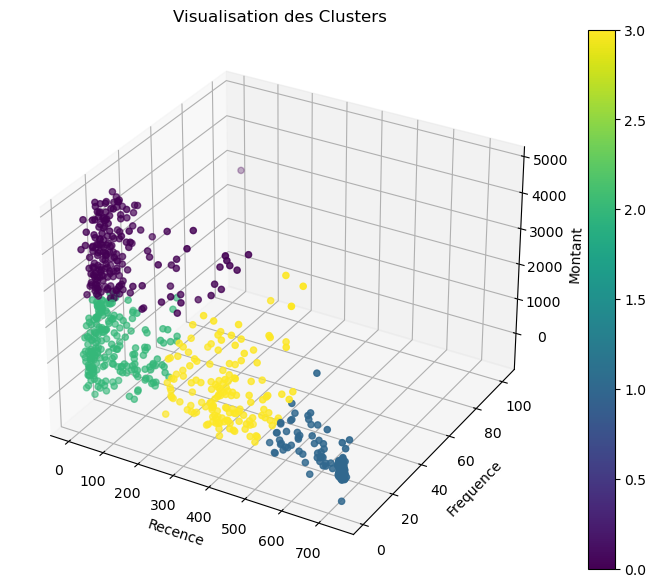

In [236]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_filtered['Recence'], df_filtered['Frequence'], df_filtered['Montant'], c=df_filtered['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()

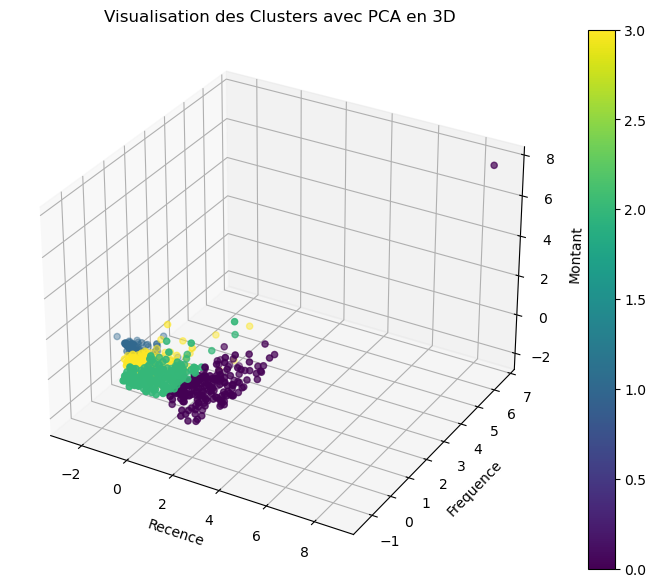

In [237]:

num_cols = ['Recence', 'Frequence', 'Montant']
data_num = df_filtered[num_cols]

data_num = (data_num - data_num.mean()) / data_num.std()

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_num)

df_principal = pd.DataFrame(data=principalComponents, columns=['Recence', 'Frequence', 'Montant'])
df_principal['Cluster'] = df_filtered['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_principal['Recence'], df_principal['Frequence'], df_principal['Montant'], c=df_principal['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters avec PCA en 3D')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()

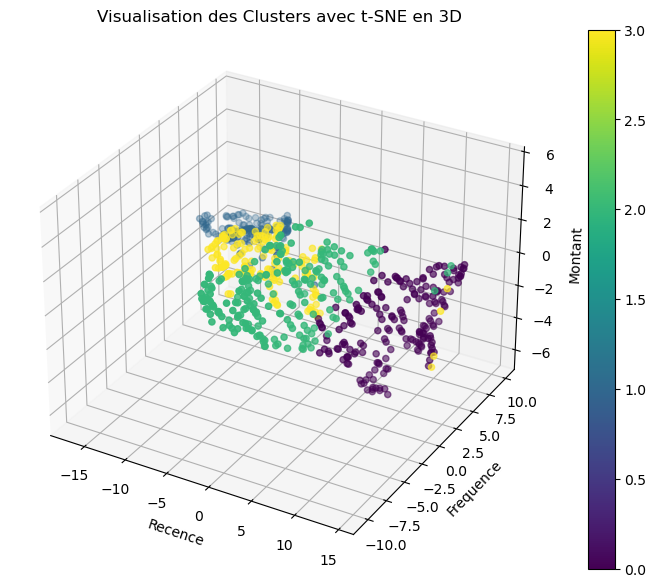

In [238]:

num_cols = ['Recence', 'Frequence', 'Montant']
data_num = df_filtered[num_cols]

data_num = (data_num - data_num.mean()) / data_num.std()

tsne = TSNE(n_components=3, random_state=0)
tsne_components = tsne.fit_transform(data_num)

df_tsne = pd.DataFrame(data=tsne_components, columns=['Recence', 'Frequence', 'Montant'])
df_tsne['Cluster'] = df_filtered['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_tsne['Recence'], df_tsne['Frequence'], df_tsne['Montant'], c=df_tsne['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters avec t-SNE en 3D')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()

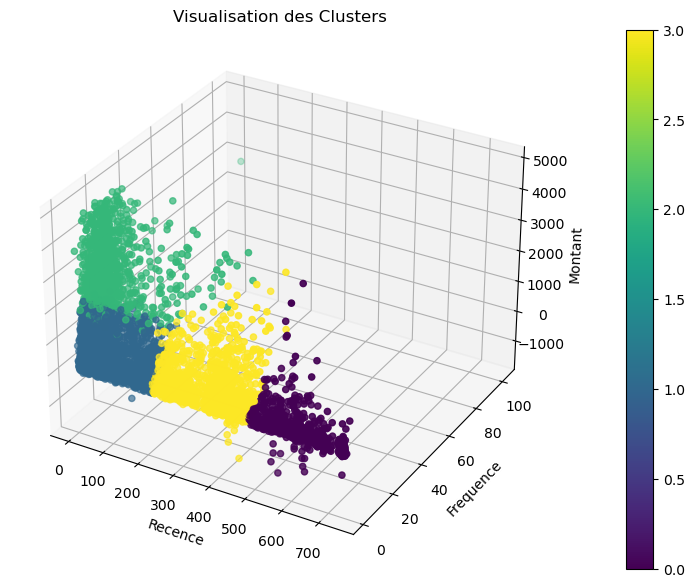

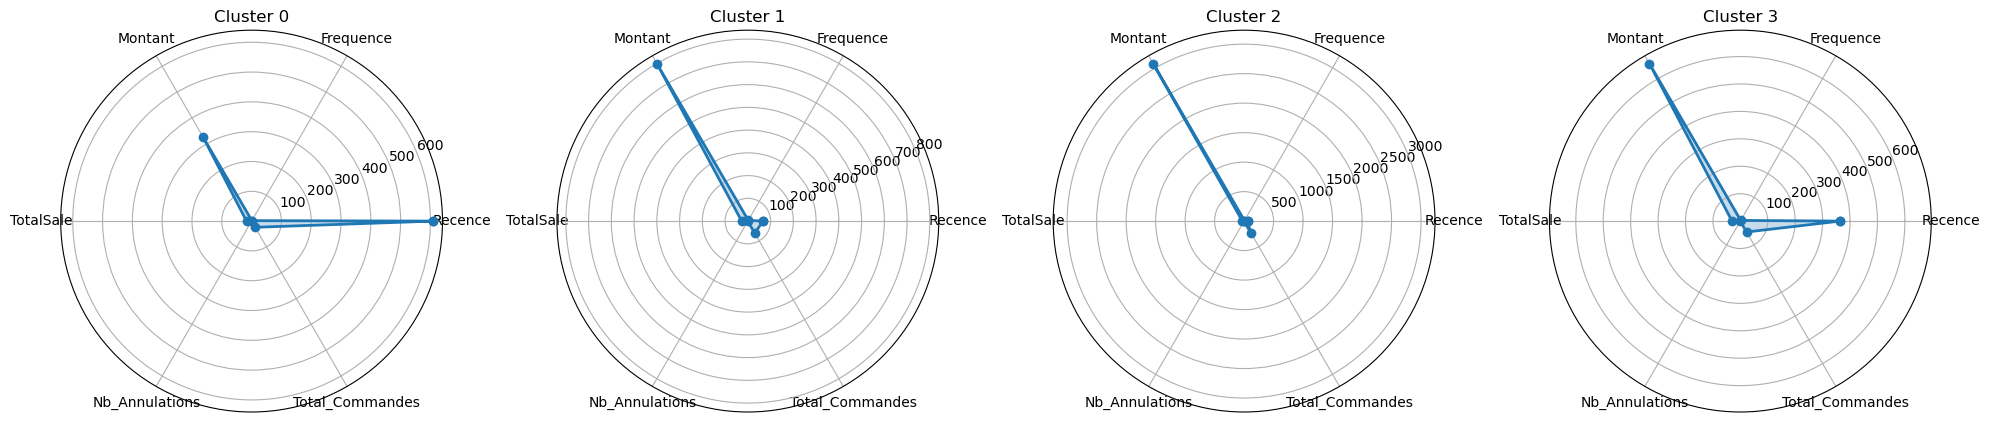

In [239]:
scaler = MinMaxScaler()

df_scale = scaler.fit_transform(df[['Recence', 'Frequence', 'Montant','TotalSale','Nb_Annulations','Total_Commandes']])
optimal_n = 4

kmeans = KMeans(n_clusters=optimal_n, random_state=0)
clusters = kmeans.fit_predict(df_scale)

df['Cluster'] = clusters

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()

caracteristiques = ['Recence', 'Frequence', 'Montant', 'TotalSale', 'Nb_Annulations', 'Total_Commandes']
cluster_means = df.groupby('Cluster')[caracteristiques].mean()

angles = [n / float(len(caracteristiques)) * 2 * np.pi for n in range(len(caracteristiques))]
angles += angles[:1]

fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=len(cluster_means), subplot_kw=dict(polar=True))

for cluster, ax in zip(cluster_means.index, axes):
    values = cluster_means.loc[cluster].values.tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(caracteristiques)
    ax.set_title(f'Cluster {cluster}')
    ax.grid(True)

plt.tight_layout()
plt.show()


Scores pour le Cluster 0:
Recence: 610.08
Frequence: 1.72
Montant: 327.32
TotalSale: 16.95
Nb_Annulations: 0.74
Total_Commandes: 23.99


Scores pour le Cluster 1:
Recence: 67.24
Frequence: 3.85
Montant: 799.31
TotalSale: 26.96
Nb_Annulations: 1.17
Total_Commandes: 60.68


Scores pour le Cluster 2:
Recence: 57.96
Frequence: 11.4
Montant: 3082.86
TotalSale: 29.49
Nb_Annulations: 4.55
Total_Commandes: 226.06


Scores pour le Cluster 3:
Recence: 363.77
Frequence: 2.86
Montant: 663.07
TotalSale: 30.29
Nb_Annulations: 1.05
Total_Commandes: 45.93




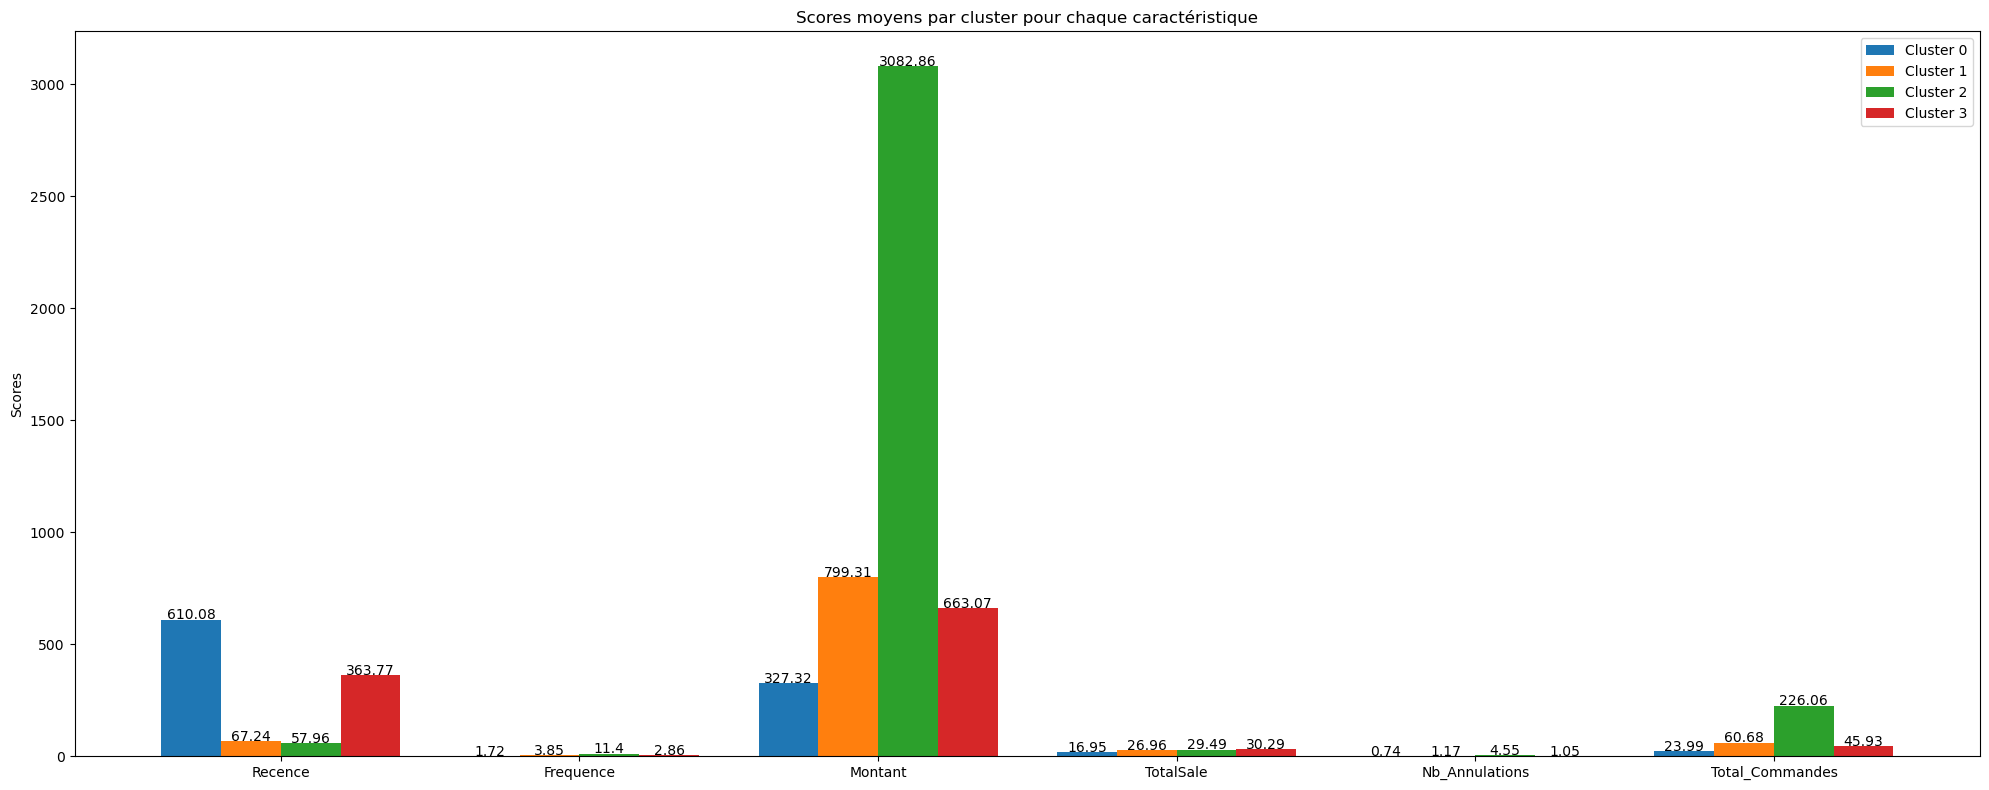

In [240]:
cluster_scores = df.groupby('Cluster')[caracteristiques].mean()

for cluster, scores in cluster_scores.iterrows():
    print(f"Scores pour le Cluster {cluster}:")
    for feature, score in scores.iteritems():
        print(f"{feature}: {score.__round__(2)}")
    print("\n")


fig, ax = plt.subplots(figsize=(20, 8)) 
x = np.arange(len(caracteristiques))
width = 0.2

for i, cluster in enumerate(cluster_scores.index):
    scores = cluster_scores.loc[cluster].values
    ax.bar(x + (i * width), scores, width, label=f"Cluster {cluster}")
    
    for j, score in enumerate(scores):
        ax.text(x[j] + (i * width), score + 0.5, round(score, 2), ha='center')
    
ax.set_xticks(x + (width * (len(cluster_scores) - 1) / 2))
ax.set_xticklabels(caracteristiques)
ax.set_ylabel('Scores')
ax.set_title('Scores moyens par cluster pour chaque caractéristique')
ax.legend()
plt.tight_layout()
plt.show()


Interval: 1 jours
Mean ARI: 0.8309285467258913
------------------
Interval: 15 jours
Mean ARI: 0.8092994807066454
------------------
Interval: 30 jours
Mean ARI: 0.7414997257196776
------------------
Interval: 60 jours
Mean ARI: 0.4492316676255913
------------------
Interval: 90 jours
Mean ARI: 0.28792309560164114
------------------
Interval: 100 jours
Mean ARI: 0.2810796098417758
------------------


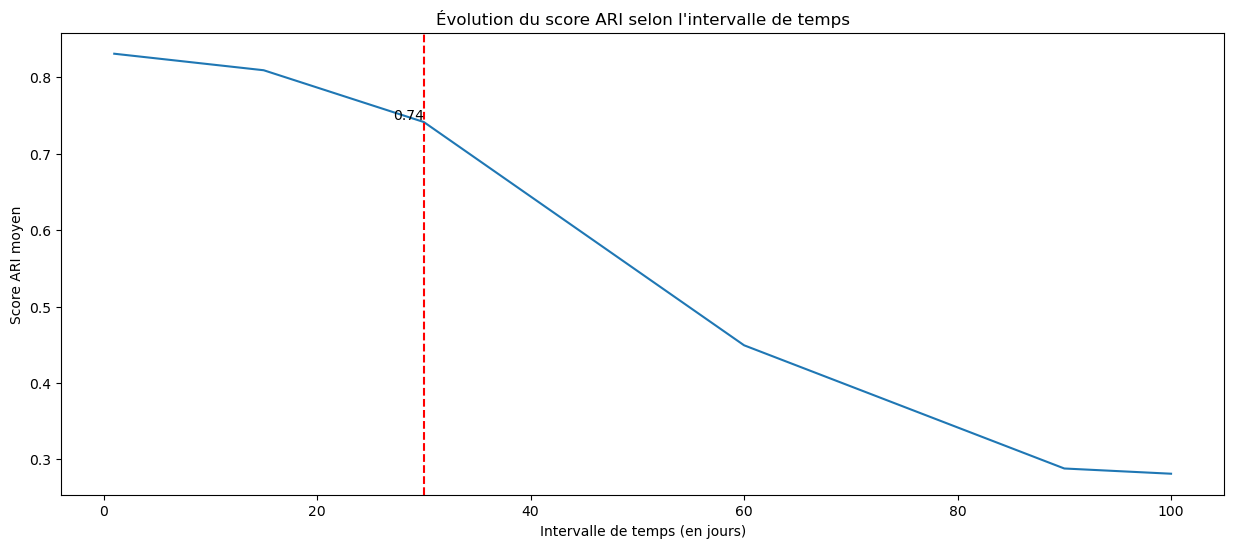

In [241]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

scaler = MinMaxScaler()
optimal_n = 4

intervals = [1, 15, 30, 60, 90, 100] 
ari_scores_means = []
initial_clusters = df['Cluster']

for interval in intervals:
    start_date = pd.to_datetime('2011-01-01')
    end_date = pd.to_datetime('2011-12-31')
    current_date = start_date
    ari_scores = []

    while current_date <= end_date:
        interval_start = current_date
        interval_end = current_date + timedelta(days=interval)
        interval_data = df[(df['InvoiceDate'] >= interval_start) & (df['InvoiceDate'] <= interval_end)]

        interval_data = interval_data[interval_data['Customer ID'].isin(df['Customer ID'])]

        if not interval_data.empty and len(interval_data) >= optimal_n:
            df_scale = scaler.fit_transform(interval_data[['Recence', 'Frequence', 'Montant', 'TotalSale', 'Nb_Annulations', 'Total_Commandes']])

            kmeans = KMeans(n_clusters=optimal_n, random_state=0)
            current_clusters = kmeans.fit_predict(df_scale)

            old_clusters = df[df['Customer ID'].isin(interval_data['Customer ID'])]['Cluster']

            ari = adjusted_rand_score(old_clusters, current_clusters)
            ari_scores.append(ari)

        current_date += timedelta(days=interval)

    print(f'Interval: {interval} jours')
    sorted_ari_scores = sorted(ari_scores, reverse=True)[:4] 
    print('Mean ARI:', np.mean(sorted_ari_scores))
    print('------------------')

    ari_scores_means.append(np.mean(sorted_ari_scores))

plt.figure(figsize=(15, 6))
plt.plot(intervals, ari_scores_means)  
plt.xlabel('Intervalle de temps (en jours)')
plt.ylabel('Score ARI moyen')
plt.title("Évolution du score ARI selon l'intervalle de temps")
plt.axvline(x=30, color='red', linestyle='--')  
index_30_days = intervals.index(30)
score_30_days = ari_scores_means[index_30_days]
plt.text(30, score_30_days, f'{score_30_days:.2f}', ha='right', va='bottom')

plt.show()